# Predict Employee Future In Company

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

## Data Extraction

In [2]:
employee = pd.read_csv('../input/employee-future-prediction/Employee.csv')

In [3]:
employee.shape

(4653, 9)

In [4]:
employee.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [5]:
employee.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


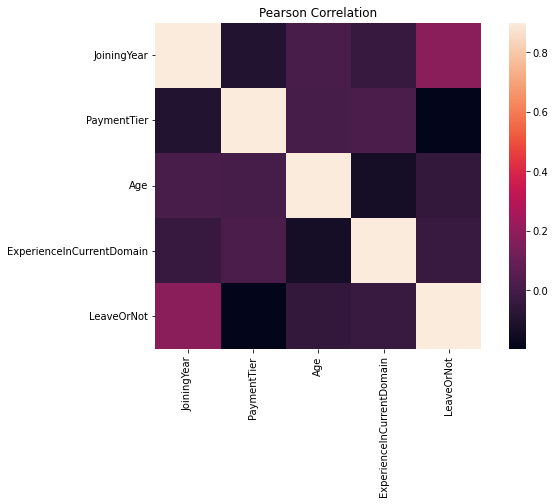

In [7]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(employee.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

In [8]:
#transform data to categorical variable
df = pd.DataFrame(employee)
df['Education'] = df['Education'].astype('category')
df['City'] = df['City'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['EverBenched'] = df['EverBenched'].astype('category')
print(df.dtypes)

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object


In [9]:
#handling categorical data
df['Education'] = df['Education'].cat.codes
df['City'] = df['City'].cat.codes
df['Gender'] = df['Gender'].cat.codes
df['EverBenched'] = df['EverBenched'].cat.codes
df.head()

Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0          0         2017     0            3   34       1            0   
1          0         2013     2            1   28       0            0   
2          0         2014     1            3   38       0            0   
3          1         2016     0            3   27       1            0   
4          1         2017     2            3   24       1            1   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [10]:
#split data
X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3257, 8)
(3257,)
(1396, 8)
(1396,)


## Classification Model

In [11]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
%time lda.fit(X_train, y_train)
lda.score(X_test, y_test)

CPU times: user 121 ms, sys: 753 µs, total: 122 ms
Wall time: 130 ms


0.7034383954154728

In [12]:
#Gaussian Naive Bayes
nb = GaussianNB()
%time nb.fit(X_train, y_train)
nb.score(X_test, y_test)

CPU times: user 3.12 ms, sys: 2.26 ms, total: 5.38 ms
Wall time: 4.4 ms


0.6905444126074498

In [13]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 362 ms, sys: 4.7 ms, total: 367 ms
Wall time: 368 ms


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.826647564469914

In [14]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 3)
%time dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

CPU times: user 5.3 ms, sys: 863 µs, total: 6.16 ms
Wall time: 5.33 ms


0.7800859598853869

In [15]:
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
%time knn.fit(X_train, y_train)
knn.score(X_test, y_test)

CPU times: user 7.82 ms, sys: 129 µs, total: 7.95 ms
Wall time: 7.92 ms


0.7707736389684814

In [16]:
#Support Vector Machine
svm = SVC(kernel = 'linear', gamma = 'auto', C = 5)
%time svm.fit(X_train, y_train)
svm.score(X_test, y_test)

CPU times: user 1.55 s, sys: 28.8 ms, total: 1.58 s
Wall time: 1.58 s


0.7034383954154728

### Compare of Modelling

In [17]:
#prepare models
models = []
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth = 3)))
models.append(('Random Forest', RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(kernel = 'linear', gamma = 'auto', C = 5)))

In [18]:
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Discriminant Analysis: 0.709217 (0.022165)
K-Nearest Neighbors: 0.786363 (0.018439)
Decision Tree: 0.788744 (0.014208)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest: 0.829143 (0.016926)
Naive Bayes: 0.687294 (0.016864)
Support Vector Machine: 0.702134 (0.018591)


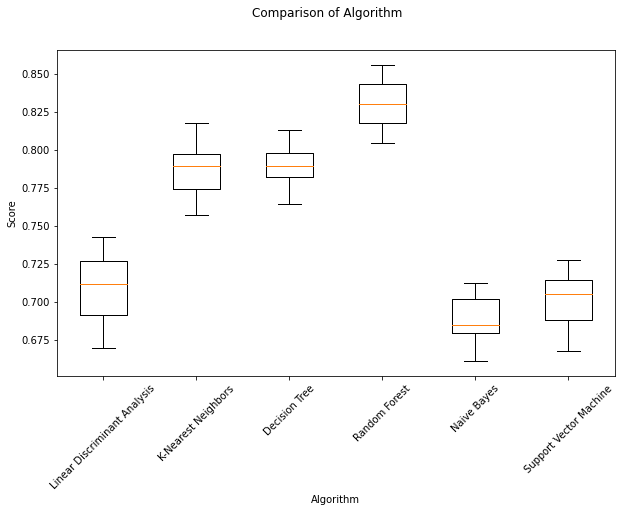

In [19]:
#boxplot of modelling
fig = plt.figure(figsize = (10,6))
fig.suptitle('Comparison of Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 45)
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()

### Random Forest model is the best score result

In [20]:
#prediction 
y_pred = rf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[833  89]
 [153 321]]


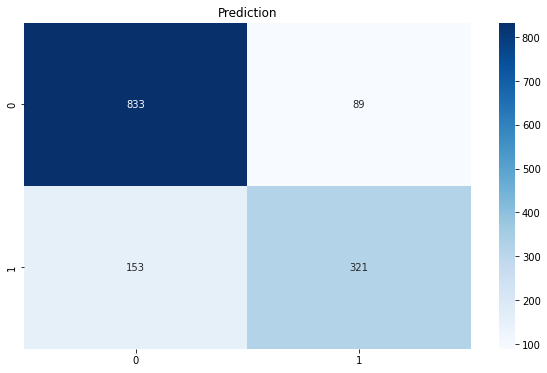

In [21]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

plt.figure(figsize = (10,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'Blues')
plt.title("Prediction")
plt.show()

In [22]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       922
           1       0.78      0.68      0.73       474

    accuracy                           0.83      1396
   macro avg       0.81      0.79      0.80      1396
weighted avg       0.82      0.83      0.82      1396



## Check Feature Importance

In [23]:
#defining of feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

JoiningYear                  0.328431
Age                          0.163789
City                         0.113360
PaymentTier                  0.100830
Gender                       0.095597
Education                    0.092952
ExperienceInCurrentDomain    0.086311
EverBenched                  0.018730
dtype: float64


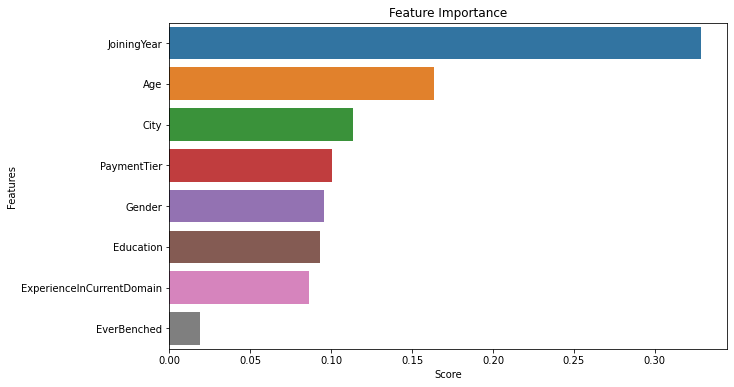

In [24]:
#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

## Visualization

In [25]:
#group education & leave or not
edu_leave = employee.groupby(['Education', 'LeaveOrNot']).size().reset_index(name = 'Count')
print(edu_leave)

   Education  LeaveOrNot  Count
0  Bachelors           0   2472
1  Bachelors           1   1129
2    Masters           0    447
3    Masters           1    426
4        PHD           0    134
5        PHD           1     45


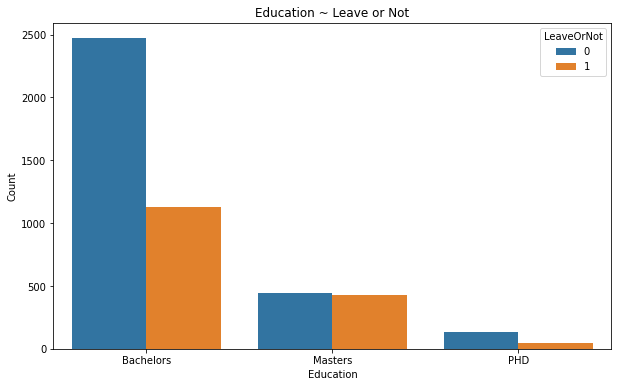

In [26]:
#visualize education ~ leave or not
plt.figure(figsize = (10,6))
sns.barplot(x = 'Education', y = 'Count', hue = 'LeaveOrNot', data = edu_leave)
plt.title("Education ~ Leave or Not")
plt.show()

In [27]:
#group city & leave or not
city_leave = employee.groupby(['City', 'LeaveOrNot']).size().reset_index(name = 'Count')
print(city_leave)

        City  LeaveOrNot  Count
0  Bangalore           0   1633
1  Bangalore           1    595
2  New Delhi           0    791
3  New Delhi           1    366
4       Pune           0    629
5       Pune           1    639


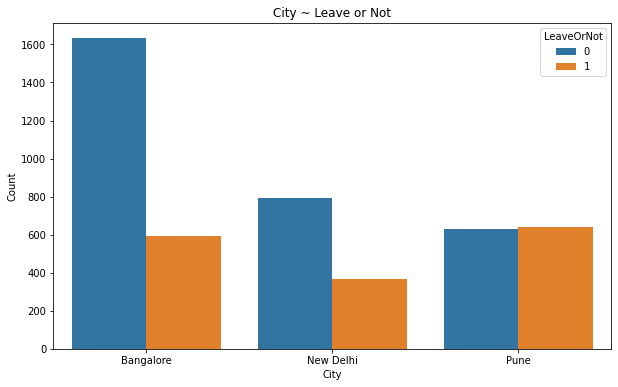

In [28]:
#visualize city ~ leave or not
plt.figure(figsize = (10,6))
sns.barplot(x = 'City', y = 'Count', hue = 'LeaveOrNot', data = city_leave)
plt.title("City ~ Leave or Not")
plt.show()

In [29]:
#group gender & leave or not
gender_leave = employee.groupby(['Gender', 'LeaveOrNot']).size().reset_index(name = 'Count')
print(gender_leave)

   Gender  LeaveOrNot  Count
0  Female           0    991
1  Female           1    884
2    Male           0   2062
3    Male           1    716


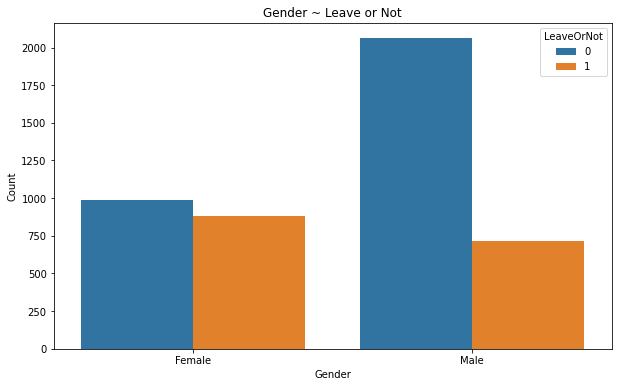

In [30]:
#visualize gender ~ leave or not
plt.figure(figsize = (10,6))
sns.barplot(x = 'Gender', y = 'Count', hue = 'LeaveOrNot', data = gender_leave)
plt.title("Gender ~ Leave or Not")
plt.show()

In [31]:
#group ever benched & leave or not
benched_leave = employee.groupby(['EverBenched', 'LeaveOrNot']).size().reset_index(name = 'Count')
print(benched_leave)

  EverBenched  LeaveOrNot  Count
0          No           0   2792
1          No           1   1383
2         Yes           0    261
3         Yes           1    217


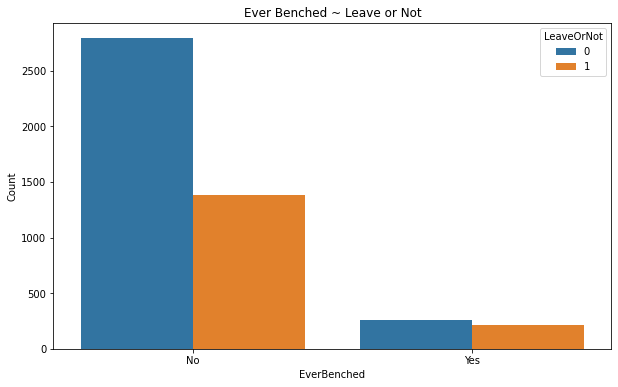

In [32]:
#visualize gender ~ leave or not
plt.figure(figsize = (10,6))
sns.barplot(x = 'EverBenched', y = 'Count', hue = 'LeaveOrNot', data = benched_leave)
plt.title("Ever Benched ~ Leave or Not")
plt.show()

In [33]:
#count of payment tier
employee['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [34]:
#transform payment tier to categorical variable
employee.PaymentTier[employee['PaymentTier'] == 1] = 'Highest'
employee.PaymentTier[employee['PaymentTier'] == 2] = 'Mid Level'
employee.PaymentTier[employee['PaymentTier'] == 3] = 'Lowest'
employee.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

Education  JoiningYear  City PaymentTier  Age  Gender  EverBenched  \
0          0         2017     0      Lowest   34       1            0   
1          0         2013     2     Highest   28       0            0   
2          0         2014     1      Lowest   38       0            0   
3          1         2016     0      Lowest   27       1            0   
4          1         2017     2      Lowest   24       1            1   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [35]:
#group payment tier & leave or not
payment_leave = employee.groupby(['PaymentTier', 'LeaveOrNot']).size().reset_index(name = 'Count')
print(payment_leave)

  PaymentTier  LeaveOrNot  Count
0     Highest           0    154
1     Highest           1     89
2      Lowest           0   2531
3      Lowest           1    961
4   Mid Level           0    368
5   Mid Level           1    550


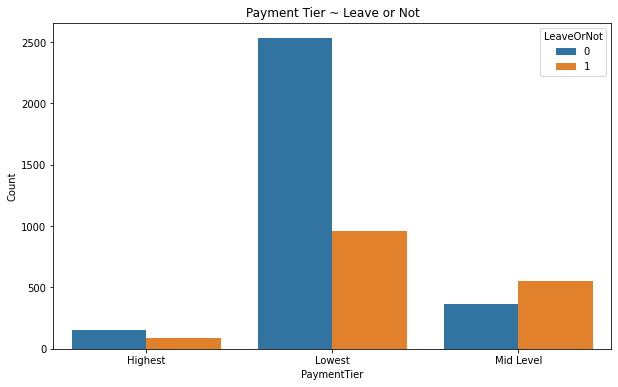

In [36]:
#visualize payment tier ~ leave or not
plt.figure(figsize = (10,6))
sns.barplot(x = 'PaymentTier', y = 'Count', hue = 'LeaveOrNot', data = payment_leave)
plt.title("Payment Tier ~ Leave or Not")
plt.show()

In [37]:
#group experience current domain & leave or not
experience_leave = employee.groupby(['ExperienceInCurrentDomain', 'LeaveOrNot']).size().reset_index(name = 'Count')
print(experience_leave)

    ExperienceInCurrentDomain  LeaveOrNot  Count
0                           0           0    231
1                           0           1    124
2                           1           0    370
3                           1           1    188
4                           2           0    688
5                           2           1    399
6                           3           0    487
7                           3           1    299
8                           4           0    634
9                           4           1    297
10                          5           0    631
11                          5           1    288
12                          6           0      6
13                          6           1      2
14                          7           0      6
15                          7           1      3


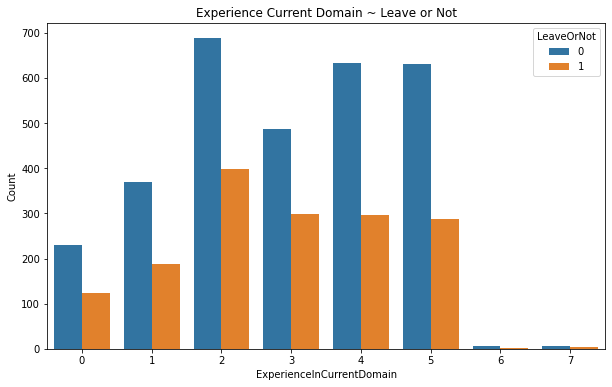

In [38]:
#visualize experience current domain ~ leave or not
plt.figure(figsize = (10,6))
sns.barplot(x = 'ExperienceInCurrentDomain', y = 'Count', hue = 'LeaveOrNot', data = experience_leave)
plt.title("Experience Current Domain ~ Leave or Not")
plt.show()